<a href="https://colab.research.google.com/github/roROHITg/Football-Player-data-Comparison/blob/main/Fullback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

In [ ]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import Radar, add_image, FontManager, grid

In [ ]:
URL = "https://play-lh.googleusercontent.com/LgkK2h2UudqIyYaU9PlR-djjiWx9sNfXLv2QkQTURHqGzhFTO539u5AGaJaX88d2_P4"
isl = Image.open(urlopen(URL))

In [ ]:
# parameter names of the statistics we want to show
params = [
    "Goals",
    "Assists",
    "Expected Assists (xA)",
    "Successful passes",
    "Accurate long balls",
    "Chances created",
    "Successful Crosses",
    "Successful Dribbles",
    "Touches in opposition box",
    "Dispossessed",
    "Tackles won",
    "Duels won",
    "Aerial duels won",
    "Interceptions",
    "Blocked",
    "Recoveries",
    "Dribbled past"
]

# The lower and upper boundaries for the statistics
low = [0, 0, 0, 30, 1, 0, 0, 0, 1, 0, 1, 4, 1, 0, 0, 4, 0]
high = [0.2, 0.2, 0.1, 40, 5, 2, 1, 2, 2, 2, 2, 8, 4, 2, 0.2, 10, 2]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [ ]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [ ]:
Player1 = [0.10, 0.00, 0.02, 39.26, 3.97, 0.63, 0.21, 0.63, 1.04, 0.00, 1.04, 6.06, 3.03, 1.25, 0.10, 5.43, 1.15]
Player2 = [0.13, 0.00, 0.02, 32.04, 1.56, 0.13, 0.52, 0.26, 1.43, 1.30, 1.17, 4.17, 1.43, 0.78, 0.13, 4.82, 0.52]
Player3 = [0.10, 0.10, 0.05, 33.90, 2.90, 1.10, 0.60, 1.10, 1.20, 0.30, 1.70, 5.60, 1.20, 1.00, 0.10, 8.20, 0.80]

Text(0.9, 0.1, 'Data: Opta\nTwitter: @Rohit_speaking')

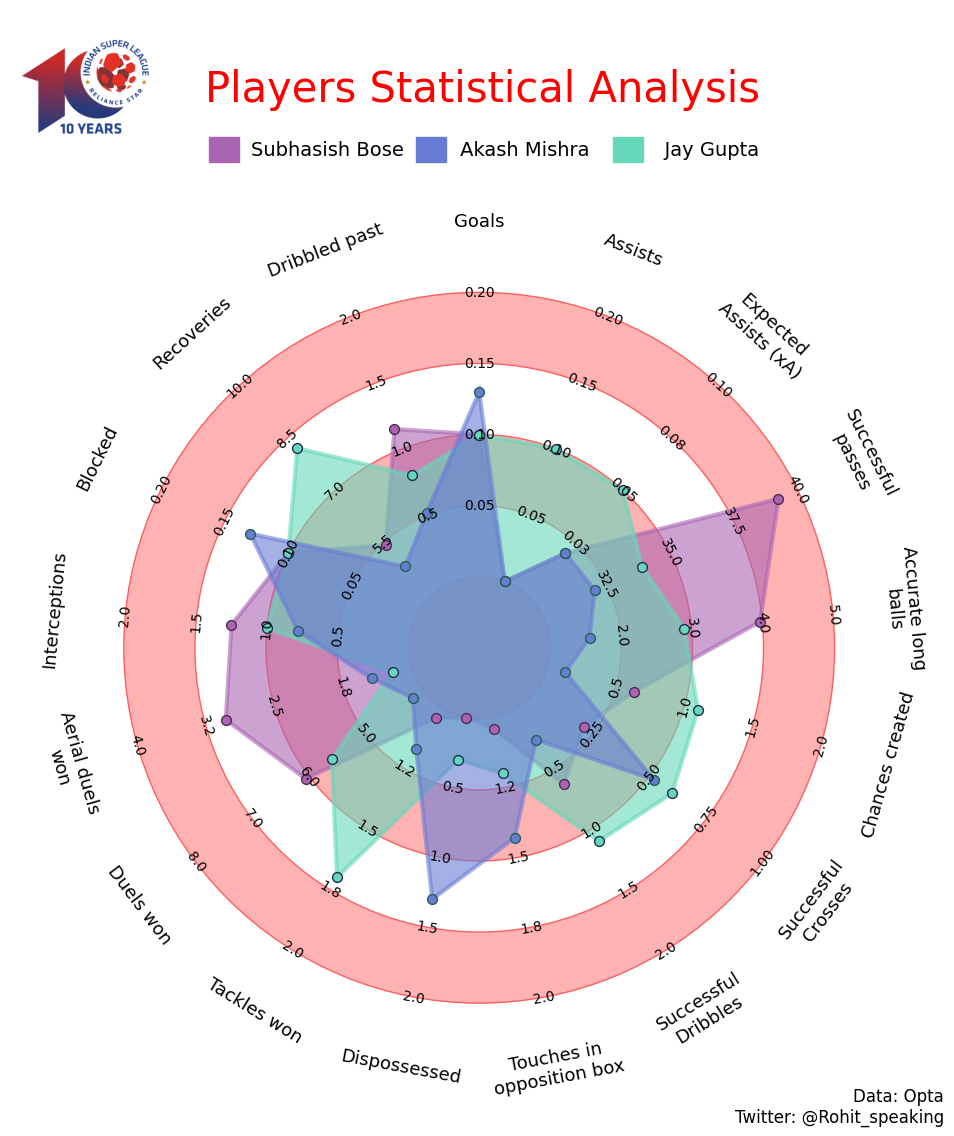

In [ ]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')


radar1, vertices1 = radar.draw_radar_solid(Player1, ax=ax,
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#aa65b2',
                                                   'lw': 3})
radar3, vertices3 = radar.draw_radar_solid(Player3, ax=ax,
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#66d8ba',
                                                   'lw': 3})
radar2, vertices2 = radar.draw_radar_solid(Player2, ax=ax,
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#697cd4',
                                                   'lw': 3})
ax.scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=50, zorder=2)
ax.scatter(vertices2[:, 0], vertices2[:, 1],
           c='#697cd4', edgecolors='#216352', marker='o', s=50, zorder=2)
ax.scatter(vertices3[:, 0], vertices3[:, 1],
           c='#66d8ba', edgecolors='#222b54', marker='o', s=50, zorder=2)


range_labels = radar.draw_range_labels(ax=ax, fontsize=10)
param_labels = radar.draw_param_labels(ax=ax, fontsize=13)


# add title
fig.text(
    0.515, 0.95, "Players Statistical Analysis", size=30,
    ha="center", color="Red"
)
# add text
fig.text(
    0.322, 0.905, "Subhasish Bose         Akash Mishra            Jay Gupta", size=14,
     color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.287, 0.9), 0.025, 0.021, fill=True, color="#aa65b2",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9), 0.025, 0.021, fill=True, color="#697cd4",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.624, 0.9), 0.025, 0.021, fill=True, color="#66d8ba",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    isl, fig, left=0.12, bottom=0.9, width=0.13, height=0.127
)   # these values might differ when you are plotting


# add credits
CREDIT_1 = "Data: Opta"
CREDIT_2 = "Twitter: @Rohit_speaking"

fig.text(
    0.90, 0.1, f"{CREDIT_1}\n{CREDIT_2}", size=12,
    color="#000000",
    ha="right"
)